## Load the data

In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [69]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

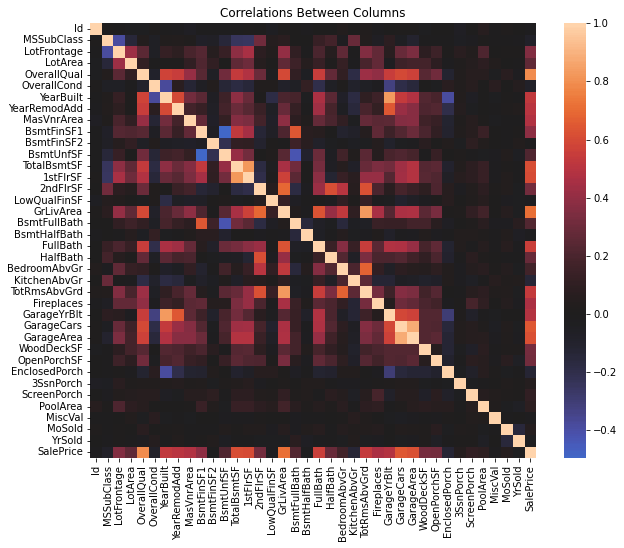

In [71]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [72]:
y = train_data.SalePrice
X = train_data.drop(columns=["SalePrice"], axis=1)

In [73]:
y.shape, X.shape, test_data.shape

((1460,), (1460, 80), (1459, 80))

In [74]:
corr_matrix = train_data.corr()

In [75]:
corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.40) | (corr_matrix["SalePrice"] < -0.40)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [76]:
important_num_cols = list(corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.5) | (corr_matrix["SalePrice"] < -0.5)].index)

important_num_cols.remove('SalePrice')
len(important_num_cols)

10

In [77]:
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [78]:
X_num_only = X[important_num_cols]

In [79]:
X_num_only.shape

(1460, 10)

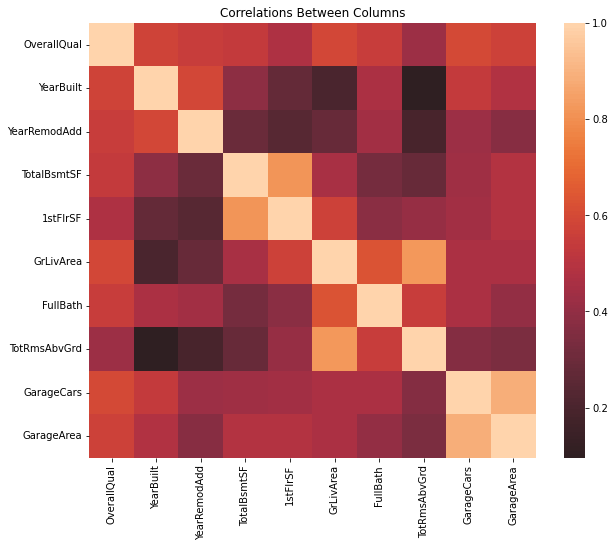

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(X_num_only.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [81]:
corr_X = X_num_only.corr()
len(corr_X)

10

In [82]:

for i in range(0, len(corr_X) - 1):
    for j in range(i + 1, len(corr_X)):
        if(corr_X.iloc[i, j] < -0.6 or corr_X.iloc[i, j] > 0.6):
            print(corr_X.iloc[i, j], i, j, corr_X.index[i], corr_X.index[j])
            

0.6006707165907149 0 8 OverallQual GarageCars
0.8195299750050339 3 4 TotalBsmtSF 1stFlrSF
0.6300116462511148 5 6 GrLivArea FullBath
0.8254893743088425 5 7 GrLivArea TotRmsAbvGrd
0.882475414281462 8 9 GarageCars GarageArea


In [83]:
# Based on the above information, we further discard the features 1stFlrSF, FullBath, TotRmsAbvGrd, GarageArea
#num_cols = [i for i in X_modified.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
num_cols = [i for i in X_num_only.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]


In [84]:
# Categorical columns - choose the important ones

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

In [85]:
X_final = X[num_cols]

In [86]:
X_final.shape

(1460, 6)

In [87]:
X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars
0,7,2003,0,856,1710,2
1,6,1976,0,1262,1262,2
2,7,2001,1,920,1786,2
3,7,1915,55,756,1717,3
4,8,2000,0,1145,2198,3


In [89]:
X_final.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
dtype: int64

In [90]:
X[cat_cols].isna().sum()

MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [91]:
X_categorical_df = pd.get_dummies(X[cat_cols], columns=cat_cols)

In [92]:
X_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1456,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1457,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1458,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [93]:
# Create final dataframe

In [94]:
X_final = X_final.join(X_categorical_df)

In [95]:
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,0,856,1710,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,0,1262,1262,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,1,920,1786,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,55,756,1717,3,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,0,1145,2198,3,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,1,953,1647,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,10,1542,2073,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,65,1152,2340,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,46,1078,1078,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [96]:
from sklearn import preprocessing
standardize = preprocessing.StandardScaler().fit(X_final[num_cols])

In [97]:
#See mean per column
standardize.mean_

array([6.09931507e+00, 1.97126781e+03, 1.35979452e+01, 1.05742945e+03,
       1.51546370e+03, 1.76712329e+00])

In [98]:
#transform
X_final[num_cols] = standardize.transform(X_final[num_cols])

In [99]:
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.514873,-0.238122,0.250402,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,0.222975,-0.147046,1.104925,1.061367,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,0.651479,-1.002492,2.100780,0.215641,1.569647,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,-0.704406,1.324258,0.046905,-0.832788,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [100]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=1)

In [102]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 37), (292, 37), (1168,), (292,))

In [103]:
from sklearn.metrics import mean_squared_log_error

In [104]:
# ANN
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError



hidden_units1 = 400
#hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
      ])
    return model
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = model.fit(
    X_final.values, 
    y.values, 
    epochs=1000, 
    batch_size=64,
    validation_split=0.2
)
predictions = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)

Epoch 1/1000
19/19 [==============================] - 1s 16ms/step - loss: 57.2426 - mean_squared_logarithmic_error: 55.9261 - val_loss: 23.4813 - val_mean_squared_logarithmic_error: 23.4480
Epoch 2/1000
19/19 [==============================] - 0s 6ms/step - loss: 17.1959 - mean_squared_logarithmic_error: 17.0781 - val_loss: 12.3867 - val_mean_squared_logarithmic_error: 12.3638
Epoch 3/1000
19/19 [==============================] - 0s 6ms/step - loss: 10.1654 - mean_squared_logarithmic_error: 10.0489 - val_loss: 8.1258 - val_mean_squared_logarithmic_error: 8.1089
Epoch 4/1000
19/19 [==============================] - 0s 6ms/step - loss: 6.9006 - mean_squared_logarithmic_error: 6.8570 - val_loss: 5.7092 - val_mean_squared_logarithmic_error: 5.6952
Epoch 5/1000
19/19 [==============================] - 0s 6ms/step - loss: 4.9023 - mean_squared_logarithmic_error: 4.8904 - val_loss: 4.1019 - val_mean_squared_logarithmic_error: 4.0906
Epoch 6/1000
19/19 [==============================] - 0s 6m

# Testing

In [105]:
# Test Data Preprocessing

X_test = test_data[num_cols + cat_cols]
X_test['YearRemodAdd'] = X_test['YearRemodAdd'] - X_test['YearBuilt']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [106]:
X_test.shape

(1459, 13)

In [107]:
# Encode categorical similar to train
X_test = pd.get_dummies(X_test)

In [108]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,0,882.0,896,1.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,6,1958,0,1329.0,1329,1.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,5,1997,1,928.0,1629,2.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,6,1998,0,926.0,1604,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1992,0,1280.0,1280,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,4,1970,0,546.0,1092,1.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,5,1960,36,1224.0,1224,2.0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,5,1992,0,912.0,970,0.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [109]:
# Add missed columns missed due to get dummies on X_test
X_test = X_test.reindex(columns = X_final.columns, fill_value=0)

In [110]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,0,882.0,896,1.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,6,1958,0,1329.0,1329,1.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,5,1997,1,928.0,1629,2.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,6,1998,0,926.0,1604,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1992,0,1280.0,1280,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,4,1970,0,546.0,1092,1.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,5,1960,36,1224.0,1224,2.0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,5,1992,0,912.0,970,0.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [111]:
#transform
X_test[num_cols] = standardize.transform(X_test[num_cols])

In [112]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.795151,-0.340077,-0.555742,-0.400017,-1.179256,-1.026858,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.071836,-0.439440,-0.555742,0.619239,-0.354966,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,-0.795151,0.852269,-0.514873,-0.295127,0.216136,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,-0.071836,0.885390,-0.555742,-0.299687,0.168544,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,1.374795,0.686666,-0.555742,0.507509,-0.448246,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-2.365440,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-1.026858,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,-0.795151,-0.373198,0.915562,0.379817,-0.554851,0.311725,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,-0.795151,0.686666,-0.555742,-0.331610,-1.038384,-2.365440,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [113]:
X_test.isna().sum()

OverallQual              0
YearBuilt                0
YearRemodAdd             0
TotalBsmtSF              1
GrLivArea                0
GarageCars               1
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Utilities_AllPub         0
Utilities_NoSeWa         0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
Heating_Floor            0
Heating_GasA             0
Heating_GasW             0
Heating_Grav             0
Heating_OthW             0
Heating_Wall             0
KitchenQual_Ex           0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
d

In [114]:
# we will use median for missing values
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].median())

In [115]:
# mode for cars
X_test['GarageCars'] = X_test['GarageCars'].fillna(train_data['GarageCars'].mode()[0])

In [116]:
# Print using ANN
preds = model.predict(X_test)
preds_2 = [i[0] for i in preds]
out = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': preds_2}) 
out.head(10)

,Id,SalePrice
0,1461,95748.601562
1,1462,154952.593750
2,1463,175328.406250
3,1464,185209.046875
4,1465,198882.265625
5,1466,179278.578125
6,1467,173461.453125
7,1468,174628.406250
8,1469,187316.171875
9,1470,122044.710938


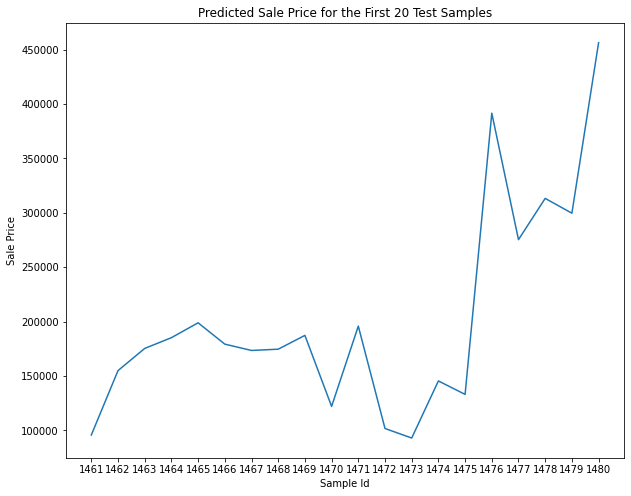

In [117]:
plt.figure(figsize=(10, 8))
plt.plot(out['SalePrice'].head(20))
plt.xticks(range(20), out['Id'].head(20))
plt.title('Predicted Sale Price for the First 20 Test Samples')
plt.xlabel('Sample Id')
plt.ylabel('Sale Price')
plt.show()